# Create Vector store instance for K collection

In [49]:
DB_NAME = "project_2_v2"
K_COLLECTION_NAME = "K_dataset"
V_COLLECTION_NAME = "V_dataset"
K_V_POISON_COLLECTION_NAME = "K_V_poison_dataset_0_8"
URI = "http://localhost:19530"
POISONING_PROPORTION_P = 0.8

In [50]:
from langchain_milvus import BM25BuiltInFunction, Milvus

import getpass
import os

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

K_vectorstore = Milvus(
    embedding_function=embeddings,
    connection_args={"uri": URI, "token": "root:Milvus", "db_name": DB_NAME},
    index_params={"index_type": "FLAT", "metric_type": "COSINE"},
    consistency_level="Strong",
    drop_old=False,  # set to True if seeking to drop the collection with that name if it exists
    auto_id=True,
    collection_name=K_COLLECTION_NAME,
)

V_vectorstore = Milvus(
    embedding_function=embeddings,
    connection_args={"uri": URI, "token": "root:Milvus", "db_name": DB_NAME},
    index_params={"index_type": "FLAT", "metric_type": "COSINE"},
    consistency_level="Strong",
    drop_old=False,  # set to True if seeking to drop the collection with that name if it exists
    auto_id=True,
    collection_name=V_COLLECTION_NAME,
)



In [51]:
K_V_vectorstore = Milvus(
    embedding_function=embeddings,
    connection_args={"uri": URI, "token": "root:Milvus", "db_name": DB_NAME},
    index_params={"index_type": "FLAT", "metric_type": "COSINE"},
    consistency_level="Strong",
    drop_old=False,  # set to True if seeking to drop the collection with that name if it exists
    auto_id=True,
    collection_name=K_V_POISON_COLLECTION_NAME,
)

# Get K dataset

In [52]:
# K_EXPECTED_METADATA_FIELDS = ['index','vector' ,'cve_id', 'cwe_id', 'cve_language']

K_pk_field_name = "pk"

# K_fields_to_retrieve = [K_pk_field_name] + K_EXPECTED_METADATA_FIELDS

K_query_expression = f"{K_pk_field_name} >= 0"

K_query_limit = 10000


K_all_samples_data = []
try:
    # Truy cập đối tượng collection pymilvus bên trong vectorstore
    # Lưu ý: việc truy cập thuộc tính .col có thể thay đổi trong các phiên bản LangChain tương lai
    if hasattr(K_vectorstore, 'col') and K_vectorstore.col is not None:
        milvus_collection = K_vectorstore.col
        # Thực hiện query trực tiếp trên đối tượng collection
        results = milvus_collection.query(
            expr=K_query_expression,
            # output_fields=K_fields_to_retrieve,
            output_fields=["*"],
            limit=K_query_limit,
            consistency_level="Strong" # Đảm bảo đọc dữ liệu mới nhất
        )
        K_all_samples_data = results
    else:
        print("Lỗi: Không thể truy cập đối tượng collection pymilvus (.col) bên trong vectorstore.")

except Exception as e:
    print(f"\nLỗi khi thực hiện query trên Milvus: {e}")

# 4. In ra kết quả
if K_all_samples_data:
    for i, sample_data in enumerate(K_all_samples_data[:5]):
        print(f"\nSample {i + 1}:")
        # sample_data ở đây là một dictionary chứa các trường bạn yêu cầu lấy ra
        print(sample_data)
else:
    print("\nQuery không trả về kết quả nào hoặc đã xảy ra lỗi.")


Sample 1:
{'text': '/*\n * icall.c:\n *\n * Authors:\n *   Dietmar Maurer (dietmar@ximian.com)\n *   Paolo Molaro (lupus@ximian.com)\n *\t Patrik Torstensson (patrik.torstensson@labs2.com)\n *\n * Copyright 2001-2003 Ximian, Inc (http://www.ximian.com)\n * Copyright 2004-2009 Novell, Inc (http://www.novell.com)\n */\n\n#include <config.h>\n#include <glib.h>\n#include <stdarg.h>\n#include <string.h>\n#include <ctype.h>\n#ifdef HAVE_ALLOCA_H\n#include <alloca.h>\n#endif\n#ifdef HAVE_SYS_TIME_H\n#include <sys/time.h>\n#endif\n#ifdef HAVE_UNISTD_H\n#include <unistd.h>\n#endif\n#if defined (PLATFORM_WIN32)\n#include <stdlib.h>\n#endif\n\n#include "mono/utils/mono-membar.h"\n#include <mono/metadata/object.h>\n#include <mono/metadata/threads.h>\n#include <mono/metadata/threads-types.h>\n#include <mono/metadata/threadpool.h>\n#include <mono/metadata/monitor.h>\n#include <mono/metadata/reflection.h>\n#include <mono/metadata/assembly.h>\n#include <mono/metadata/tabledefs.h>\n#include <mono/meta

# K mean clustering for K dataset

Số lượng sample trong K_dataset: 350
Shape của mảng feature vectors F: (350, 3072)

--- Xác định số cụm tối ưu (Elbow Method) ---
Đang thử nghiệm với k = 1...
Đang thử nghiệm với k = 2...
Đang thử nghiệm với k = 3...
Đang thử nghiệm với k = 4...
Đang thử nghiệm với k = 5...
Đang thử nghiệm với k = 6...
Đang thử nghiệm với k = 7...
Đang thử nghiệm với k = 8...
Đang thử nghiệm với k = 9...
Đang thử nghiệm với k = 10...
Đang thử nghiệm với k = 11...
Đang thử nghiệm với k = 12...
Đang thử nghiệm với k = 13...
Đang thử nghiệm với k = 14...
Đang thử nghiệm với k = 15...
Đang thử nghiệm với k = 16...
Đang thử nghiệm với k = 17...
Đang thử nghiệm với k = 18...
Đang thử nghiệm với k = 19...
Đang thử nghiệm với k = 20...


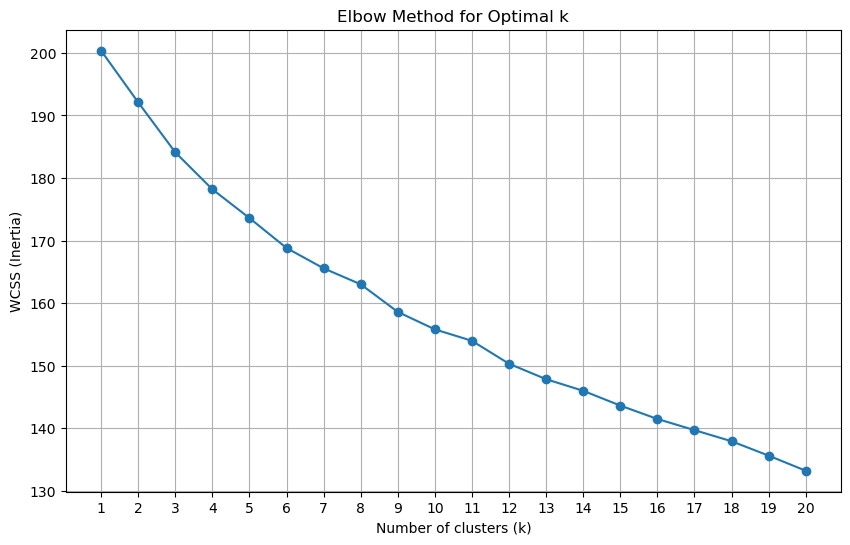


Đã chọn số cụm tối ưu t = 10

--- Thực hiện K-means với t = 10 cụm ---

Số lượng sample trong mỗi cụm:
  Cụm 0: 15 samples
  Cụm 1: 22 samples
  Cụm 2: 74 samples
  Cụm 3: 11 samples
  Cụm 4: 44 samples
  Cụm 5: 60 samples
  Cụm 6: 33 samples
  Cụm 7: 35 samples
  Cụm 8: 26 samples
  Cụm 9: 30 samples

--- Step 2: Selecting Representative Elements ---
Sử dụng tỷ lệ đầu độc p = 0.8

Cụm 0:
  - Tổng số samples (ni): 15
  - Số samples đại diện cần chọn (n'i = floor(p*ni)): 12
  - Đã chọn 12 samples đại diện.

Cụm 1:
  - Tổng số samples (ni): 22
  - Số samples đại diện cần chọn (n'i = floor(p*ni)): 17
  - Đã chọn 17 samples đại diện.

Cụm 2:
  - Tổng số samples (ni): 74
  - Số samples đại diện cần chọn (n'i = floor(p*ni)): 59
  - Đã chọn 59 samples đại diện.

Cụm 3:
  - Tổng số samples (ni): 11
  - Số samples đại diện cần chọn (n'i = floor(p*ni)): 8
  - Đã chọn 8 samples đại diện.

Cụm 4:
  - Tổng số samples (ni): 44
  - Số samples đại diện cần chọn (n'i = floor(p*ni)): 35
  - Đã chọn 35 

In [53]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances # Hoặc dùng scipy.spatial.distance
import matplotlib.pyplot as plt
import math
from collections import Counter, defaultdict
import os
import warnings

os.environ["OMP_NUM_THREADS"] = '1'
warnings.filterwarnings('ignore')
K_MAX_CLUSTERS = 21 # Kiểm tra từ 1 đến 20 clusters

# Kiểm tra xem có dữ liệu không
if not K_all_samples_data or not isinstance(K_all_samples_data, list) or 'vector' not in K_all_samples_data[0]:
    print("Lỗi: K_all_samples_data không hợp lệ hoặc không chứa trường 'vector'.")
    # Thoát hoặc xử lý lỗi phù hợp
    exit()

print(f"Số lượng sample trong K_dataset: {len(K_all_samples_data)}")

# ===== Step 1: Clustering of Knowledge Base Elements =====

# 1. Chuẩn bị dữ liệu vector (feature vectors F)
# Trích xuất tất cả các vector từ K_all_samples_data
feature_vectors_F = np.array([sample['vector'] for sample in K_all_samples_data])
print(f"Shape của mảng feature vectors F: {feature_vectors_F.shape}")

# 2. Xác định số lượng cụm tối ưu (t) bằng Elbow Method
print("\n--- Xác định số cụm tối ưu (Elbow Method) ---")
wcss = [] # Within-Cluster Sum of Squares
# Thử nghiệm với số cụm từ 1 đến K_MAX_CLUSTERS (ví dụ: 20)
# Lưu ý: Số lượng này cần đủ lớn để thấy được "khuỷu tay"
possible_k_values = range(1, K_MAX_CLUSTERS)

for k in possible_k_values:
    print(f"Đang thử nghiệm với k = {k}...")
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42, verbose=0)
    kmeans_elbow.fit(feature_vectors_F)
    wcss.append(kmeans_elbow.inertia_) # inertia_ chính là WCSS

# Vẽ đồ thị Elbow
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# 3. Chọn số cụm (t) từ đồ thị Elbow
# Người dùng cần nhìn vào đồ thị và quyết định giá trị 't' (k) tối ưu
# Ví dụ: chọn giá trị tại "khuỷu tay"
try:
    optimal_k = int(input("Nhập số cụm tối ưu (t) bạn chọn từ đồ thị Elbow: "))
    if not (1 <= optimal_k < K_MAX_CLUSTERS):
        raise ValueError("Số cụm không hợp lệ.")
except ValueError as e:
    print(f"Lỗi: {e}. Sử dụng giá trị mặc định, ví dụ k=5.")
    optimal_k = 5 # Đặt giá trị mặc định nếu input lỗi

print(f"\nĐã chọn số cụm tối ưu t = {optimal_k}")

# 4. Thực hiện K-means với số cụm đã chọn
print(f"\n--- Thực hiện K-means với t = {optimal_k} cụm ---")
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42, verbose=0)
# kmeans.fit(feature_vectors_F) # Đã fit ở bước elbow nếu dùng lại
# Hoặc fit lại để chắc chắn:
kmeans.fit(feature_vectors_F)

# 5. Lấy nhãn cụm cho từng sample và centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Gán nhãn cụm vào dữ liệu gốc để tiện theo dõi
for i, sample in enumerate(K_all_samples_data):
    sample['cluster_label'] = cluster_labels[i]

# In ra số lượng sample trong mỗi cụm
cluster_counts = Counter(cluster_labels)
print("\nSố lượng sample trong mỗi cụm:")
for label, count in sorted(cluster_counts.items()):
    print(f"  Cụm {label}: {count} samples")

# Tạo danh sách các cụm C = {C0, C1, ..., Ct-1}
clusters_C = defaultdict(list)
for i, sample in enumerate(K_all_samples_data):
    clusters_C[sample['cluster_label']].append(sample) # Lưu toàn bộ dict của sample vào cụm

# ===== Step 2: Selecting Representative Elements =====

print("\n--- Step 2: Selecting Representative Elements ---")

# 1. Xác định tỷ lệ đầu độc (poisoning proportion p)
# Giá trị này thường được xác định trong thiết lập thử nghiệm của bài báo
# Ví dụ: p = 0.1 nghĩa là chọn 10% số phần tử gần centroid nhất từ mỗi cụm
poisoning_proportion_p = POISONING_PROPORTION_P # Ví dụ: 10%
print(f"Sử dụng tỷ lệ đầu độc p = {poisoning_proportion_p}")

# 2. Chọn các phần tử đại diện từ mỗi cụm
representative_samples_by_cluster = defaultdict(list)

for i in range(optimal_k): # Duyệt qua từng cụm từ 0 đến t-1
    cluster_samples = clusters_C[i]
    n_i = len(cluster_samples) # Số lượng phần tử trong cụm Ci

    if n_i == 0:
        print(f"Cảnh báo: Cụm {i} không có sample nào.")
        continue

    # Tính số lượng phần tử đại diện cần chọn n'_i
    n_prime_i = math.floor(poisoning_proportion_p * n_i)
    print(f"\nCụm {i}:")
    print(f"  - Tổng số samples (ni): {n_i}")
    print(f"  - Số samples đại diện cần chọn (n'i = floor(p*ni)): {n_prime_i}")

    if n_prime_i == 0:
        print(f"  - Không chọn sample đại diện nào cho cụm {i} (do n'i = 0).")
        continue

    # Lấy centroid của cụm hiện tại
    current_centroid = centroids[i].reshape(1, -1) # Reshape để dùng với pairwise_distances

    # Lấy feature vectors của các sample trong cụm hiện tại
    cluster_vectors = np.array([sample['vector'] for sample in cluster_samples])

    # Tính khoảng cách từ mỗi sample trong cụm đến centroid của cụm đó
    # Sử dụng khoảng cách Euclidean (COSINE), giống K-means
    distances = pairwise_distances(cluster_vectors, current_centroid, metric='euclidean').flatten()

    # Gắn khoảng cách vào từng sample để tiện sort
    for sample_idx, sample in enumerate(cluster_samples):
        sample['distance_to_centroid'] = distances[sample_idx]

    # Sắp xếp các sample trong cụm theo khoảng cách tăng dần
    cluster_samples.sort(key=lambda x: x['distance_to_centroid'])

    # Chọn ra n'_i sample gần centroid nhất
    selected_representatives = cluster_samples[:n_prime_i]
    representative_samples_by_cluster[i] = selected_representatives

    print(f"  - Đã chọn {len(selected_representatives)} samples đại diện.")



print("\n--- Hoàn thành việc chọn Representative Elements ---")


# Choosing V for injecting into K 

In [54]:
import os
import numpy as np
# Đảm bảo bạn đã import pymilvus nếu cần dùng trực tiếp
from pymilvus import Collection, connections # Có thể cần connections nếu chưa connect
from tqdm import tqdm

print("\n--- Step 3 (Revised): Finding similar V examples AND retrieving vectors using pymilvus.search ---")

final_vulnerable_set_V_docs = []

search_params = {
    "metric_type": "COSINE",  # Hoặc "IP"
    "params": {},         # Ví dụ: {"nprobe": 10} nếu dùng IVF_FLAT
}

# Lặp qua từng cụm
for cluster_label, representatives in representative_samples_by_cluster.items():
    print(f"\nProcessing representatives for Cluster {cluster_label}...")
    # Lặp qua từng sample đại diện trong cụm
    for rep_idx, representative_sample in enumerate(representatives):
        query_vector = representative_sample.get('vector')
        # Lấy pk của sample đại diện từ K để dễ theo dõi log
        rep_pk_k = representative_sample.get('pk') # Giả định sample K có 'pk'

        if query_vector is None:
            print(f"  - Warning: Representative sample K (pk={rep_pk_k}) is missing 'vector'. Skipping.")
            continue

        query_vector_list = [query_vector] # search nhận list of vectors

        # print(f"  - Finding most similar V sample (and vector) for representative K (pk={rep_pk_k})...")

        try:
            # *** THỰC HIỆN TÌM KIẾM BẰNG PYMILVUS.SEARCH ***
            search_results_pymilvus = V_vectorstore.col.search(
                data=query_vector_list,
                anns_field='vector',
                param=search_params,
                limit=1,                  # Chỉ lấy 1 kết quả
                output_fields=["*"] # <--- Yêu cầu trả về các trường này
            )
            
            temp_dict = {}
            temp_dict['text'] = search_results_pymilvus[0][0].text 
            temp_dict['pk'] = search_results_pymilvus[0][0].pk 
            temp_dict['vector'] = search_results_pymilvus[0][0].vector 
            temp_dict['index'] = search_results_pymilvus[0][0].index 
            temp_dict['cve_id'] = search_results_pymilvus[0][0].cve_id 
            temp_dict['cwe_id'] = search_results_pymilvus[0][0].cwe_id 
            temp_dict['cve_language'] = search_results_pymilvus[0][0].cve_language 
            temp_dict['original_sample_index'] = search_results_pymilvus[0][0].original_sample_index
            temp_dict['chunk_id'] = search_results_pymilvus[0][0].chunk_id
            temp_dict['total_chunks'] = search_results_pymilvus[0][0].total_chunks
            
            final_vulnerable_set_V_docs.append(temp_dict) # Lưu kết quả tìm kiếm vào danh sách

        except Exception as e:
            print(f"    - Error during pymilvus search for representative K (pk={rep_pk_k}): {e}")
            import traceback
            traceback.print_exc()

print(f"\n--- Finished Vulnerability Injection ---")
print(f"Total vulnerable examples identified with vectors: {len(final_vulnerable_set_V_docs)}")


--- Step 3 (Revised): Finding similar V examples AND retrieving vectors using pymilvus.search ---

Processing representatives for Cluster 0...

Processing representatives for Cluster 1...

Processing representatives for Cluster 2...

Processing representatives for Cluster 3...

Processing representatives for Cluster 4...

Processing representatives for Cluster 5...

Processing representatives for Cluster 6...

Processing representatives for Cluster 7...

Processing representatives for Cluster 8...

Processing representatives for Cluster 9...

--- Finished Vulnerability Injection ---
Total vulnerable examples identified with vectors: 277


In [55]:
from pymilvus import MilvusClient

client = MilvusClient(
    uri="http://localhost:19530",
    token="root:Milvus",
    db_name = DB_NAME,
)


In [56]:
K_all_samples_data = [
    {k: v for k, v in item.items() if k != "pk" and k != "cluster_label" and k != "distance_to_centroid" and k != "original_sample_index"}
    for item in K_all_samples_data
]


In [57]:
from pymilvus import MilvusClient, DataType, CollectionSchema, FieldSchema
import numpy as np
from tqdm import tqdm # Để hiển thị tiến trình


print(f"\n--- Định nghĩa Schema cho '{K_V_POISON_COLLECTION_NAME}' theo yêu cầu ---")
DIMENSION = 3072
# 1. Định nghĩa các trường theo schema yêu cầu
pk_field = FieldSchema(name="pk", dtype=DataType.INT64, is_primary=True, auto_id=True)
vector_field = FieldSchema(name="vector", dtype=DataType.FLOAT_VECTOR, dim=DIMENSION)
text_field = FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=65535, default_value="")
index_field = FieldSchema(name="index", dtype=DataType.INT64, default_value=0) # Đặt default nếu cần
cve_id_field = FieldSchema(name="cve_id", dtype=DataType.VARCHAR, max_length=65535, default_value="")
cwe_id_field = FieldSchema(name="cwe_id", dtype=DataType.VARCHAR, max_length=65535, default_value="")
cve_language_field = FieldSchema(name="cve_language", dtype=DataType.VARCHAR, max_length=65535, default_value="")
# original_sample_index_field = FieldSchema(name="original_sample_index", dtype=DataType.INT64, default_value=0) # Khác với code trước, đây là INT64
chunk_id_field = FieldSchema(name="chunk_id", dtype=DataType.INT64, default_value=-1)
total_chunks_field = FieldSchema(name="total_chunks", dtype=DataType.INT64, default_value=0)
# Thêm trường data_source để phân biệt K và V (Rất hữu ích)
data_source_field = FieldSchema(name="data_source", dtype=DataType.VARCHAR, max_length=10)

# 2. Tạo Schema
# Sắp xếp các trường theo ý muốn, PK thường đặt trước
schema = CollectionSchema(
    fields=[
        pk_field, # Khóa chính auto_id
        vector_field,
        text_field,
        index_field,
        cve_id_field,
        cwe_id_field,
        cve_language_field,
        # original_sample_index_field,
        chunk_id_field,
        total_chunks_field,
        data_source_field # Thêm trường nguồn
    ],
    description="Schema matching the specified structure for K_V poisoned data",
    enable_dynamic_field=False
)
print("CollectionSchema đã được tạo theo cấu trúc yêu cầu.")


--- Định nghĩa Schema cho 'K_V_poison_dataset_0_8' theo yêu cầu ---
CollectionSchema đã được tạo theo cấu trúc yêu cầu.


In [58]:

try:
    client.create_collection(
        collection_name=K_V_POISON_COLLECTION_NAME,
        schema=schema, # Cung cấp schema đã định nghĩa
        consistency_level="Strong"
    )
    print("Collection tạo thành công.")
except Exception as e:
    print(f"Lỗi khi tạo collection: {e}")

Collection tạo thành công.


In [59]:
# Lấy danh sách tên các trường có trong schema (trừ PK auto_id)
schema_field_names = {field.name for field in schema.fields if not (field.is_primary and field.auto_id)}
print(f"Các trường cần chuẩn bị dữ liệu: {schema_field_names}")

# Hàm trợ giúp để lấy và chuyển đổi kiểu dữ liệu nếu cần
def safe_get_and_convert(data_dict, key, target_type, default_value):
    value = data_dict.get(key)
    if value is None:
        return default_value
    try:
        if target_type == str:
            return str(value)
        elif target_type == int:
            return int(value)
        elif target_type == float:
            return float(value)
        # Thêm các chuyển đổi khác nếu cần
        return value # Trả về nguyên gốc nếu không cần chuyển
    except (ValueError, TypeError):
        # print(f"Warning: Cannot convert value '{value}' for key '{key}' to {target_type}. Using default: {default_value}")
        return default_value



Các trường cần chuẩn bị dữ liệu: {'cve_language', 'cve_id', 'index', 'text', 'data_source', 'vector', 'total_chunks', 'cwe_id', 'chunk_id'}


In [60]:
combined_data_to_insert = []

# Xử lý dữ liệu K
print("Đang chuẩn bị dữ liệu từ K_all_samples_data...")
skipped_k = 0
for sample in tqdm(K_all_samples_data):
    if sample.get('vector') is None: # Vector là bắt buộc
        skipped_k += 1
        continue

    insert_dict = {}
    # Lấy các trường khớp với schema
    insert_dict['vector'] = sample['vector']
    # Ánh xạ các trường khác, xử lý kiểu và giá trị thiếu
    insert_dict['text'] = safe_get_and_convert(sample, 'text', str, "") 
    insert_dict['index'] = safe_get_and_convert(sample, 'index', int, 0)
    insert_dict['cve_id'] = safe_get_and_convert(sample, 'cve_id', str, "")
    insert_dict['cwe_id'] = safe_get_and_convert(sample, 'cwe_id', str, "")
    insert_dict['cve_language'] = safe_get_and_convert(sample, 'cve_language', str, "")
    insert_dict['chunk_id'] = safe_get_and_convert(sample, 'chunk_id', int, -1)
    
    # ===== THÊM DÒNG NÀY ĐỂ SỬA LỖI =====
    insert_dict['total_chunks'] = safe_get_and_convert(sample, 'total_chunks', int, 0) # Gán giá trị mặc định cho trường bị thiếu
    
    insert_dict['data_source'] = "K"

    # Lọc lại chỉ giữ các key có trong schema
    filtered_insert_dict = {k: v for k, v in insert_dict.items() if k in schema_field_names}
    combined_data_to_insert.append(filtered_insert_dict)

if skipped_k > 0:
    print(f"Đã bỏ qua {skipped_k} bản ghi K do thiếu vector.")

Đang chuẩn bị dữ liệu từ K_all_samples_data...


100%|██████████| 350/350 [00:00<00:00, 85893.53it/s]


In [61]:
final_vulnerable_set_V_docs = [
    {k: v for k, v in item.items() if k != "pk" and k != "cluster_label" and k != "distance_to_centroid" and k != "original_sample_index"}
    for item in final_vulnerable_set_V_docs
]

In [62]:
for sample in final_vulnerable_set_V_docs:
    sample['data_source'] = "V"  # Gán nguồn dữ liệu là V
    combined_data_to_insert.append(sample)

In [63]:

len(combined_data_to_insert)

627

In [64]:
res = client.insert(
    collection_name=K_V_POISON_COLLECTION_NAME,
    data=combined_data_to_insert,
)